# Data Analysis Project: Bike Sharing Dataset
- Nama: Anggun Sulis Setyawan
- Email: sul191120@gmail.com
- Id Dicoding: sulbae0

## Business Questions

1. How was the monthly trend in 2011 - 2012?
2. What season was most popular for cycling?
3. When was the busiest time of the day?

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

### Gathering Data

In [117]:
# Daily Data
daily_dataset_df = pd.read_csv("https://raw.githubusercontent.com/Sulbae/Bike-Sharing-Practice/refs/heads/main/day.csv")

In [118]:
# Hourly Data
hourly_dataset_df = pd.read_csv("https://raw.githubusercontent.com/Sulbae/Bike-Sharing-Practice/refs/heads/main/hour.csv")

### Assessing Data

#### Data Characteristics

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

#### __Daily data__

In [125]:
daily_dataset_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [126]:
daily_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Note:
* Type of dteday column values is _object_. It should be a _datetime_.
* Type of yr column values is encoded. It should be a year time.
* Type of _season, mnth, weekday, holiday, workingday_ columns values are _int64_. Those should be an _object_.

In [127]:
print("Jumlah duplikasi:", daily_dataset_df.duplicated().sum())

Jumlah duplikasi: 0


#### __Hourly data__

In [128]:
hourly_dataset_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [129]:
hourly_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Note:
* Type of dteday column values is _object_. It should be a _datetime_.
* Type of yr column values is encoded. It should be a year time.
* Type of _season, mnth, weekday, holiday, workingday_ columns values are _int64_. Those should be an _object_.

In [130]:
print("Jumlah duplikasi:", hourly_dataset_df.duplicated().sum())

Jumlah duplikasi: 0


### Transform Data

#### __daily_dataset_df__

In [131]:
# dteday column
daily_dataset_df["dteday"] = pd.to_datetime(daily_dataset_df["dteday"])

In [132]:
# yr column
years = {0: 2011, 
         1: 2012}

daily_dataset_df["yr"] = daily_dataset_df["yr"].map(years)

In [133]:
# season column
seasons = {1: "spring", 
           2: "summer", 
           3: "fall", 
           4: "winter"}

daily_dataset_df["season"] = daily_dataset_df["season"].map(seasons)

In [134]:
# mnth column
months = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

daily_dataset_df["mnth"] = daily_dataset_df["mnth"].map(months)

In [135]:
# weekday column
days = {
    0: "sunday",
    1: "monday",
    2: "tuesday",
    3: "wednesday",
    4: "thursday",
    5: "friday",
    6: "saturday"
}

daily_dataset_df["weekday"] = daily_dataset_df["weekday"].map(days)

In [136]:
# holiday column
holidays = {
    0: "no",
    1: "yes"
}

daily_dataset_df["holiday"] = daily_dataset_df["holiday"].map(holidays)

# workingday column
workingdays = {
    0: "no",
    1: "yes"
}

daily_dataset_df["workingday"] = daily_dataset_df["workingday"].map(workingdays)

In [137]:
daily_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [138]:
daily_dataset_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,January,no,saturday,no,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,January,no,sunday,no,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,January,no,monday,yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,January,no,tuesday,yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,January,no,wednesday,yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,spring,2012,December,no,thursday,yes,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,spring,2012,December,no,friday,yes,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,spring,2012,December,no,saturday,no,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,spring,2012,December,no,sunday,no,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


#### __hourly_dataset_df__

In [139]:
hourly_dataset_df["dteday"] = pd.to_datetime(hourly_dataset_df["dteday"])

In [140]:
# yr column
years = {0: 2011, 
         1: 2012}

hourly_dataset_df["yr"] = hourly_dataset_df["yr"].map(years)

In [141]:
# season column
seasons = {1: "spring", 
           2: "summer", 
           3: "fall", 
           4: "winter"}

hourly_dataset_df["season"] = hourly_dataset_df["season"].map(seasons)

In [142]:
# mnth column
months = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

hourly_dataset_df["mnth"] = hourly_dataset_df["mnth"].map(months)

In [143]:
# weekday column
days = {
    0: "sunday",
    1: "monday",
    2: "tuesday",
    3: "wednesday",
    4: "thursday",
    5: "friday",
    6: "saturday"
}

hourly_dataset_df["weekday"] = hourly_dataset_df["weekday"].map(days)

In [144]:
# holiday column
holidays = {
    0: "no",
    1: "yes"
}

hourly_dataset_df["holiday"] = hourly_dataset_df["holiday"].map(holidays)

# workingday column
workingdays = {
    0: "no",
    1: "yes"
}

hourly_dataset_df["workingday"] = hourly_dataset_df["workingday"].map(workingdays)

In [145]:
hourly_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [146]:
hourly_dataset_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,January,0,no,saturday,no,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,spring,2011,January,1,no,saturday,no,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,spring,2011,January,2,no,saturday,no,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,spring,2011,January,3,no,saturday,no,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,spring,2011,January,4,no,saturday,no,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,spring,2012,December,19,no,monday,yes,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,spring,2012,December,20,no,monday,yes,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,spring,2012,December,21,no,monday,yes,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,spring,2012,December,22,no,monday,yes,1,0.26,0.2727,0.56,0.1343,13,48,61


In [147]:
daily_dataset_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,January,no,saturday,no,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,January,no,sunday,no,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,January,no,monday,yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,January,no,tuesday,yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,January,no,wednesday,yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,spring,2012,December,no,thursday,yes,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,spring,2012,December,no,friday,yes,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,spring,2012,December,no,saturday,no,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,spring,2012,December,no,sunday,no,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [148]:
all_data_df = pd.merge(
    left=hourly_dataset_df,
    right=daily_dataset_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_all_df.head()

KeyError: 'order_id'

## Exploratory Data Analysis (EDA)

### Question 1: How was the monthly trend in 2011 - 2012?

In [160]:
daily_dataset_df.rename(columns={"yr": "year", "dteday": "date", "mnth": "month", "cnt": "total_users"}, inplace=True)
daily_dataset_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_users
0,1,2011-01-01,spring,2011,January,no,saturday,no,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,January,no,sunday,no,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,January,no,monday,yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,January,no,tuesday,yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,January,no,wednesday,yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [161]:
daily_dataset_df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
instant,731.0,NaN,NaN,NaN,366.0,1.0,183.5,366.0,548.5,731.0,211.165812
date,731,NaN,NaN,NaN,2012-01-01 00:00:00,2011-01-01 00:00:00,2011-07-02 12:00:00,2012-01-01 00:00:00,2012-07-01 12:00:00,2012-12-31 00:00:00,NaN
season,731,4,fall,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,731.0,NaN,NaN,NaN,2011.500684,2011.0,2011.0,2012.0,2012.0,2012.0,0.500342
month,731,12,January,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,731,2,no,710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,731,7,saturday,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,731,2,yes,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weathersit,731.0,NaN,NaN,NaN,1.395349,1.0,1.0,1.0,2.0,3.0,0.544894
temp,731.0,NaN,NaN,NaN,0.495385,0.05913,0.337083,0.498333,0.655417,0.861667,0.183051


In [168]:
months_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
]

daily_dataset_df['month'] = pd.Categorical(daily_dataset_df['month'], 
                                           categories=months_order, 
                                           ordered=True)

In [180]:
monthly_trend = daily_dataset_df.groupby(pd.Grouper(key="date", freq="M")).agg({"total_users":"sum"}).sort_index()
monthly_trend.index = monthly_trend.index.strftime("%b %Y")

monthly_trend = monthly_trend.reset_index()
monthly_trend

C:\Users\ACER\AppData\Local\Temp\ipykernel_14392\2039283750.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = daily_dataset_df.groupby(pd.Grouper(key="date", freq="M")).agg({"total_users":"sum"}).sort_index()


,date,total_users
0,Jan 2011,38189
1,Feb 2011,48215
2,Mar 2011,64045
3,Apr 2011,94870
4,May 2011,135821
5,Jun 2011,143512
6,Jul 2011,141341
7,Aug 2011,136691
8,Sep 2011,127418
9,Oct 2011,123511


### Question 2: What season was most popular for cycling?

In [203]:
season_order = [
    "spring",
    "summer",
    "fall",
    "winter",
]

daily_dataset_df['season'] = pd.Categorical(daily_dataset_df['season'], 
                                           categories=season_order, 
                                           ordered=True)

In [231]:
seasonal_trend = daily_dataset_df.groupby(by="season").agg({"total_users":"sum"}).sort_index()

seasonal_trend = seasonal_trend.reset_index()

seasonal_trend_sorted = seasonal_trend.sort_values(by="total_users", ascending=False)

seasonal_trend_sorted

C:\Users\ACER\AppData\Local\Temp\ipykernel_14392\2256194581.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_trend = daily_dataset_df.groupby(by="season").agg({"total_users":"sum"}).sort_index()


,season,total_users
2,fall,1061129
1,summer,918589
3,winter,841613
0,spring,471348


### Question 3: When was the busiest time of the day?

#### Explore hourly_dataset_df

In [154]:
hourly_dataset_df.rename(columns={"yr": "year", "dteday": "date", "mnth": "month", "hr": "hour"}, inplace=True)
hourly_dataset_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,January,0,no,saturday,no,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,January,1,no,saturday,no,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,January,2,no,saturday,no,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,January,3,no,saturday,no,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,January,4,no,saturday,no,1,0.24,0.2879,0.75,0.0,0,1,1


In [156]:
hourly_dataset_df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
instant,17379.0,NaN,NaN,NaN,8690.0,1.0,4345.5,8690.0,13034.5,17379.0,5017.0295
date,17379,NaN,NaN,NaN,2012-01-02 04:08:34.552045568,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-02 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
season,17379,4,fall,4496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,17379.0,NaN,NaN,NaN,2011.502561,2011.0,2011.0,2012.0,2012.0,2012.0,0.500008
month,17379,12,May,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,17379.0,NaN,NaN,NaN,11.546752,0.0,6.0,12.0,18.0,23.0,6.914405
holiday,17379,2,no,16879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,17379,7,saturday,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,17379,2,yes,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weathersit,17379.0,NaN,NaN,NaN,1.425283,1.0,1.0,1.0,2.0,4.0,0.639357


## Visualization & Explanatory Analysis

### Question 1: How was the monthly trend in 2011 - 2012?

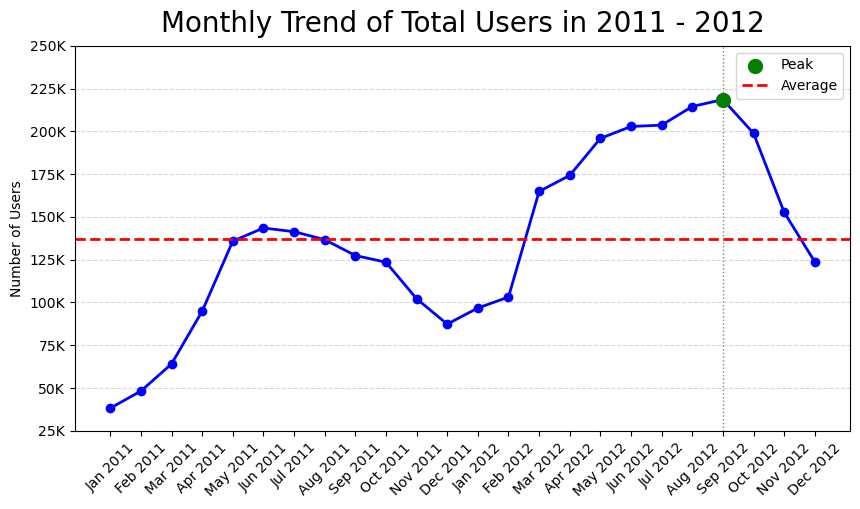

In [247]:
trend_fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    monthly_trend["date"], 
    monthly_trend["total_users"], 
    marker="o",
    linestyle="-",
    linewidth=2,
    color="b" 
)

max_index = monthly_trend["total_users"].idxmax()
ax.scatter(monthly_trend["date"].iloc[max_index], monthly_trend["total_users"].iloc[max_index],
            color="green",
            s=100,
            edgecolors="green",
            zorder=5,
            label="Peak")

ax.axhline(monthly_trend["total_users"].mean(), 
            color="red", 
            linestyle="--",
            linewidth=2,
            label="Average",
)

ax.axvline(monthly_trend["date"].iloc[max_index], 
            color="grey", 
            linestyle=":",
            linewidth=1)

ax.set_title(
    "Monthly Trend of Total Users in 2011 - 2012", 
    loc="center",
    pad=10,
    fontsize=20
)

ax.tick_params(axis="x", rotation=45, labelsize=10)
ax.tick_params(axis="y", labelsize=10)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(x/1000)}K" for x in yticks])

ax.set_ylabel("Number of Users")

ax.grid(axis="y", which="both", linestyle="--", alpha=0.5)
ax.legend()

trend_plot = trend_fig

plt.show()

*__Insight__*:
- a

### Question 2: What season was most popular for cycling?

C:\Users\ACER\AppData\Local\Temp\ipykernel_14392\3240743743.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


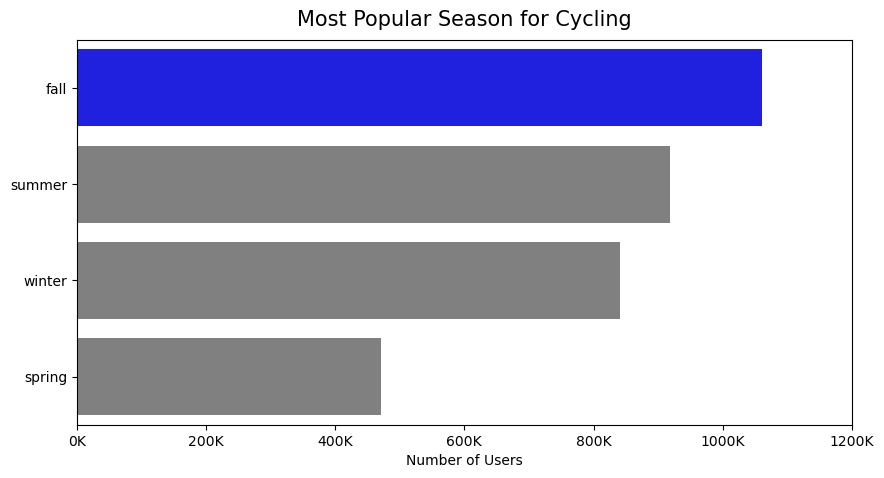

In [243]:
season_fig, ax = plt.subplots(nrows=1, figsize=(10, 5))

max_value = seasonal_trend_sorted["total_users"].max() 

colors = ["blue" if value == max_value else "grey" for value in seasonal_trend_sorted["total_users"]]

sns.barplot(
    x="total_users", 
    y="season", 
    data=seasonal_trend_sorted,
    order=seasonal_trend_sorted["season"],
    palette=colors
)

xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x/1000)}K" for x in xticks])

plt.title("Most Popular Season for Cycling", 
          loc="center", 
          fontsize=15,
          pad=10
)

plt.ylabel(None)
plt.xlabel("Number of Users")

season_plot = season_fig

plt.show()

*__Insight__*:
- a

### Question 3: When was the busiest time of the day?

## Conclusion

### Question 1: How was the monthly trend in 2011 - 2012?

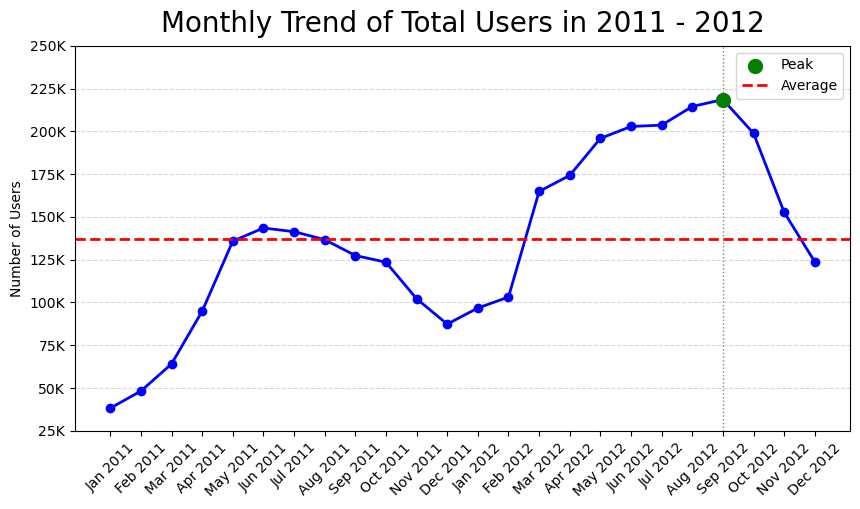

In [248]:
trend_plot

- Secara keseluruhan total nilai transaksaksi dari Januari - Desember 2017 mengalami tren peningkatan.
- Nilai transaksi mengalami peningkatan signifikan hingga 1 juta dolar pada bulan November, tetapi nilainya kembali turun pada bulan Desember.

### Question 2: What season was most popular for cycling?

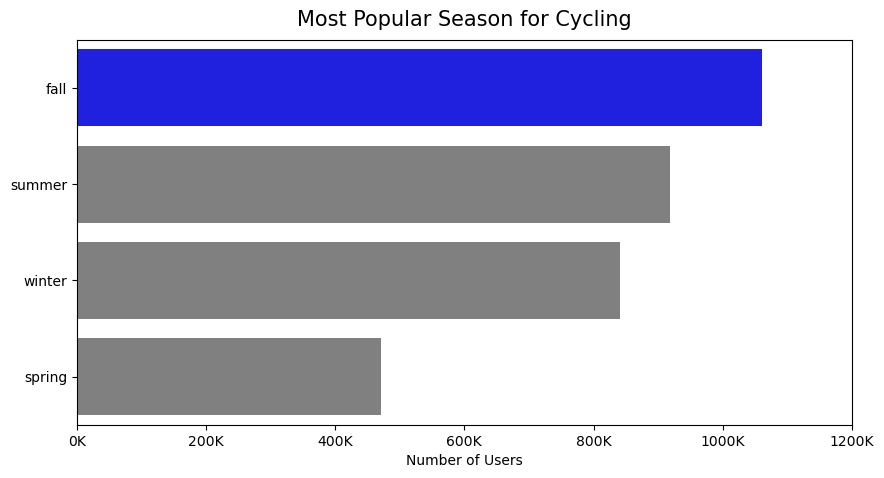

In [244]:
season_plot

- Top 5 kategori produk yang paling laris dibeli customer pada tahun 2017 adalah:
    1. Cama Mesa Banho
    2. Esporte Lazer
    3. Beleza Saude
    4. Moveis Decaracao
    5. Informatica Acessorios

- Kelima kategori produk tersebut mampu terjual hingga lebih dari 2500 kali. 

### Question 3: When was the busiest time of the day?